In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
marcaciones = pd.read_excel("bd_marcaciones.xlsx", sheet_name=None)
marcaciones = {key:marcaciones[key] for key in marcaciones if len(marcaciones[key]) > 0}
df_asignacion = marcaciones.pop("Asignacion")

# Iterate through each DataFrame in the dictionary
for sheet_name, df in marcaciones.items():
    # Remove leading and trailing whitespaces from column names
    df.columns = df.columns.str.strip()


In [3]:
len(marcaciones)

60

In [4]:
marcaciones_reales = {key:marcaciones[key] for key in marcaciones if marcaciones[key].Tipo[0] == "Real"}
marcaciones_generadas = {key:marcaciones[key] for key in marcaciones if marcaciones[key].Tipo[0] != "Real"}

In [5]:
count_reales_in_gen = [(df["Calificación"] == "Real").sum() for _, df in marcaciones_generadas.items()]
count_reales_in_real = [(df["Calificación"] == "Real").sum() for _, df in marcaciones_reales.items()]

In [6]:
mean_real_in_gen = np.mean(count_reales_in_gen)
mean_real_in_real = np.mean(count_reales_in_real)
var_real_in_gen = np.var(count_reales_in_gen)
var_real_in_real = np.var(count_reales_in_real)

df = len(count_reales_in_real) + len(count_reales_in_gen) - 1

In [7]:
from scipy import stats
stats.ttest_ind(count_reales_in_gen, count_reales_in_real)

TtestResult(statistic=-0.16591842323322537, pvalue=0.8687981648598583, df=58.0)

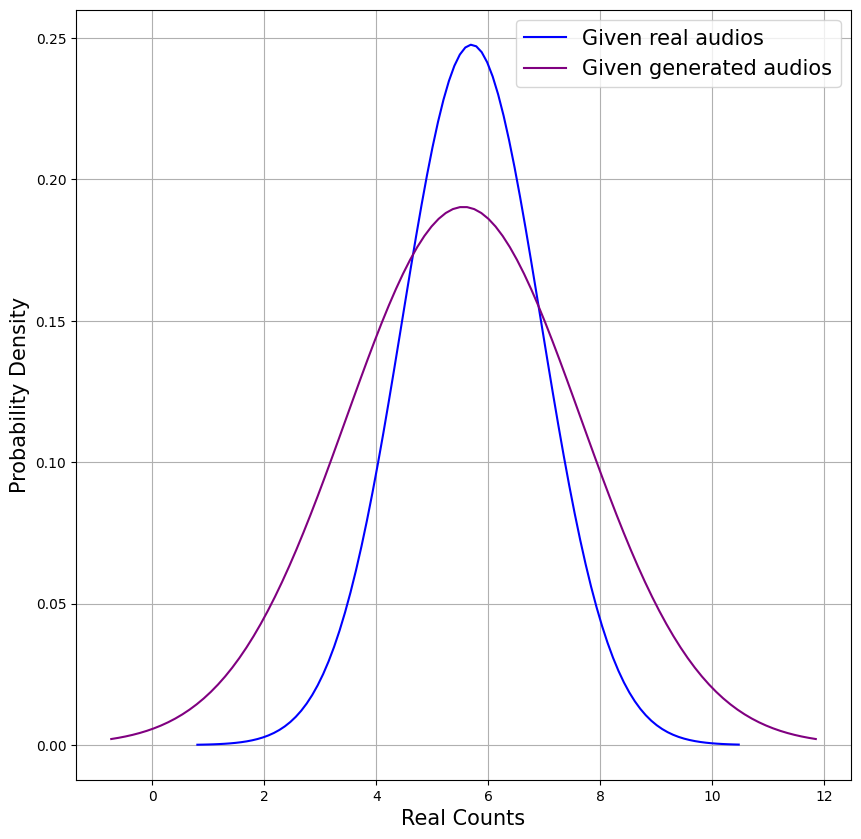

In [19]:
sigma_1 = np.sqrt(var_real_in_gen)
x_1 = np.linspace(mean_real_in_gen - 3*sigma_1, mean_real_in_gen + 3*sigma_1, 100) 
y_1 = norm.pdf(x_1, mean_real_in_gen, sigma_1)


sigma_2 = np.sqrt(var_real_in_real)
x_2 = np.linspace(mean_real_in_real - 3*sigma_2, mean_real_in_real + 3*sigma_2, 100) 
y_2 = norm.pdf(x_1, mean_real_in_real, sigma_2)

plt.figure(figsize=(10, 10))
# Create the plot
plt.plot(x_2, y_2, c="blue", label="Given real audios")
plt.plot(x_1, y_1, c="purple", label="Given generated audios")
plt.xlabel('Real Counts', fontsize=15)
plt.ylabel('Probability Density', fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)
# Show the plot
plt.show()